In [2]:

# 1. Завантажте файл Housing.csv. Виведіть перші 5 рядків
import pandas as pd

# Завантажте файл Housing.csv
df = pd.read_csv('Housing.csv')

# Виведіть перші 5 рядків
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# 2.Зробіть новий датасет, який містить тільки ці стовпчики.
# columns = ['price', 'area', 'bedrooms', 'bathrooms']


selected_columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_df = df.loc[:, selected_columns]


print(new_df.head())

      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


In [6]:

# 3.Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність
# відсутніх значень та інші особливості даних.
# Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, 
# потім змінити тип даних на float, потім на середнє значення за стовпчиком.

import numpy as np

print("Структура даних:")
print(new_df.info())


print("\nОсобливості даних:")
print(new_df.describe())


new_df.replace('-', np.nan, inplace=True)


new_df = new_df.astype(float)


new_df.fillna(new_df.mean(), inplace=True)


print("\nСтруктура даних після замін:")
print(new_df.info())

Структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None

Особливості даних:
              price          area    bedrooms   bathrooms
count  5.450000e+02    545.000000  545.000000  545.000000
mean   4.766729e+06   5150.541284    2.965138    1.286239
std    1.870440e+06   2170.141023    0.738064    0.502470
min    1.750000e+06   1650.000000    1.000000    1.000000
25%    3.430000e+06   3600.000000    2.000000    1.000000
50%    4.340000e+06   4600.000000    3.000000    1.000000
75%    5.740000e+06   6360.000000    3.000000    2.000000
max    1.330000e+07  16200.000000    6.000000    4.000000

Структура даних після замін:
<class 'pandas.core.frame.DataFrame

In [7]:
# 4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі 
# та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення 
# було близьким до  0, а стандартне відхилення - близьким до 1.
# Примітка. Для нормалізації можна використовувати стандартні функції або написати самостійно.


new_df = new_df.astype(float)

new_df.fillna(new_df.mean(), inplace=True)

normalized_df = (new_df - new_df.mean()) / new_df.std()

print(normalized_df.head())

      price      area  bedrooms  bathrooms
0  4.562174  1.045766  1.402131   1.420507
1  4.000809  1.755397  1.402131   5.400847
2  4.000809  2.216196  0.047235   1.420507
3  3.982096  1.082630  1.402131   1.420507
4  3.551716  1.045766  1.402131  -0.569663


In [9]:
# 5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

from sklearn.model_selection import train_test_split

X = normalized_df.drop('price', axis=1)  # Ознаки, усі стовпчики крім 'price'
y = normalized_df['price']  # Цільова змінна - 'price'


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Розмірність навчальних ознак (X_train):", X_train.shape)
print("Розмірність тестових ознак (X_test):", X_test.shape)
print("Розмірність навчальних цільових змінних (y_train):", y_train.shape)
print("Розмірність тестових цільових змінних (y_test):", y_test.shape)

Розмірність навчальних ознак (X_train): (436, 3)
Розмірність тестових ознак (X_test): (109, 3)
Розмірність навчальних цільових змінних (y_train): (436,)
Розмірність тестових цільових змінних (y_test): (109,)


In [11]:
# 6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень)
# та цільову змінну (ціну на будинок).

attributes = ['area', 'bathrooms', 'bedrooms']
target = ['price']

X = normalized_df[attributes]  # атрибути
y = normalized_df[target]  # цільова змінна

In [14]:
# 7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
print("Точність на навчальних даних: {:.2f}%".format(training_accuracy * 100))

Точність на навчальних даних: 49.38%


In [30]:
# 8. Оцініть якість моделі на тестових даних, використовуючи показники, такі
# як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2).
# Потім застосуйте  крос-валідацію для підвищення якості моделі.
# Порівняйте результати (без крос-валідації і з крос-валідацією).

from sklearn.metrics import mean_squared_error, r2_score

# Зробіть прогнози на тестових даних
y_test_pred = model.predict(X_test)

# Оцініть модель за допомогою метрик
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Оцінка моделі на тестових даних (без крос-валідації):")
print("RMSE на тестових даних:", test_rmse)
print("R-squared на тестових даних:", test_r2)

Оцінка моделі на тестових даних (без крос-валідації):
RMSE на тестових даних: 0.8865961703451432
R-squared на тестових даних: 0.4559299118872445


In [31]:
from sklearn.model_selection import cross_val_score

# Використайте крос-валідацію для оцінки якості моделі
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("\nОцінка моделі за допомогою крос-валідації:")
print("Середнє RMSE за крос-валідацією:", cv_rmse_scores.mean())
print("Середній R-squared за крос-валідацією:", cv_r2_scores.mean())


Оцінка моделі за допомогою крос-валідації:
Середнє RMSE за крос-валідацією: 0.6762410649309802
Середній R-squared за крос-валідацією: 0.45481563115186374


In [ ]:
# Низьке значення RMSE вказує на те, що модель має добру точність і низьку дисперсію помилок.
# Після крос-валідації значення покращились

In [32]:
# 9. Виконайте аналіз результатів та виведіть прогнозовані 
# ціни на будинки для тестового набору даних.

predicted_prices = model.predict(X_test)

# Виведіть прогнозовані ціни на будинки для тестового набору даних
print("Прогнозовані ціни на будинки для тестового набору даних:")
print(predicted_prices)

Прогнозовані ціни на будинки для тестового набору даних:
[ 0.86420262  0.78244766 -0.62490334 -0.25501941 -0.44710539  0.06266125
  0.39511776  0.69612738 -0.77266179 -0.67982495  2.1196134  -0.64448134
 -0.68400672 -0.60594573 -0.44525841  1.01278421 -1.00168739 -0.07032135
 -0.09802606 -0.26289514 -0.25132545  0.08205455 -0.69712028 -0.47665708
  0.34524929  1.42150295 -0.8003665   0.13600445  1.25950469 -0.81698933
  0.32070251 -0.60225177  0.69009863  0.04326796 -0.10400268  0.43152135
 -0.32040252 -0.39859609 -0.53576046  0.28923755  0.29538081 -0.70062955
  0.76767182 -0.40277786 -0.1243716  -0.28413542  0.69009863 -0.12893692
  0.11573588 -0.81698933  0.96252827 -0.81698933  0.06402043 -0.34736844
 -0.31363498 -0.64103836  0.64392412 -0.73523437  0.20536657 -0.66923088
 -0.02332369 -0.02375937 -0.181628   -0.45498113 -0.18852811 -0.48404501
  0.60834368 -0.62441553  0.56552779 -0.12573077  0.10829974 -0.00383005
  0.1803802   1.52123991 -0.87535391  0.5612978  -0.50805575 -0.481

In [35]:
# Частина 2: Знайдіть параметри аналітичним рішенням
# . Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) 
# для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.


X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]


theta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)


print("Коефіцієнти лінійної регресії (ваги моделі):")
print("theta0 (intercept):", theta[0])
print("theta1 (для першої ознаки):", theta[1])


Коефіцієнти лінійної регресії (ваги моделі):
theta0 (intercept): [2.41993925e-16]
theta1 (для першої ознаки): [0.43945209]


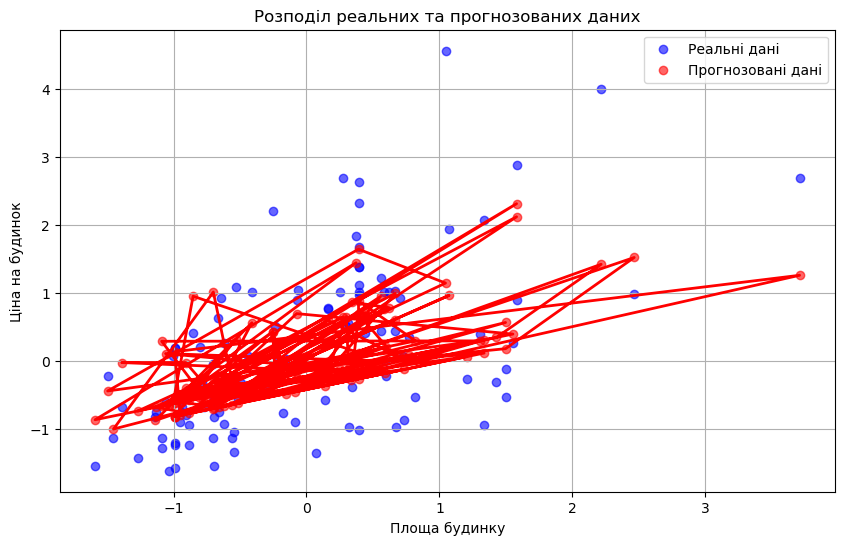

In [38]:
# Частина 3: Візуалізація результатів та порівняння
# 9.Візуалізуйте дані та результати регресії: побудуйте графіки 
# для ознайомлення з розподілом даних і лінійною регресійною моделлю

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.scatter(X_test['area'], y_test, color='blue', label='Реальні дані', alpha=0.6)


plt.scatter(X_test['area'], predicted_prices, color='red', label='Прогнозовані дані', alpha=0.6)


plt.plot(X_test['area'], predicted_prices, color='red', linewidth=2)


plt.xlabel('Площа будинку')
plt.ylabel('Ціна на будинок')
plt.title('Розподіл реальних та прогнозованих даних')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# 10. Порівняйте отримані параметри (коефіцієнти) лінійної регресії 
# з аналітичними результатами та оцініть, наскільки схожі вони.


theta_analytical = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)


print("Аналітично знайдені коефіцієнти лінійної регресії:")
print("theta0 (intercept):", theta_analytical[0])
print("theta1 (для першої ознаки):", theta_analytical[1])

print("\nКоефіцієнти лінійної регресії, знайдені за допомогою навчання моделі:")
print("theta0 (intercept):", theta[0])
print("theta1 (для першої ознаки):", theta[1])


Аналітично знайдені коефіцієнти лінійної регресії:
theta0 (intercept): [2.41993925e-16]
theta1 (для першої ознаки): [0.43945209]

Коефіцієнти лінійної регресії, знайдені за допомогою навчання моделі:
theta0 (intercept): [2.41993925e-16]
theta1 (для першої ознаки): [0.43945209]


In [ ]:
# отримані параметри однакові

In [41]:
# 11. Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні
# цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.

# Ціни на будинок прогнозуються більш-менш нормально